# Introduction to Keras

* high-level neural networks API, written in Python, part of [TensorFlow 2.x](https://www.tensorflow.org/)
* Allows easy and fast prototyping
* Runs seamlessly on CPU and GPU
* open source
* Documentation: [https://keras.io/](https://keras.io/)

## installation
First install the backend, for example [TensorFlow](https://www.tensorflow.org/install/).

`$ pip install keras`

## MNIST classification task

The MNIST data set is a database of handwritten digits that is commonly used for training various image processing systems. The goal if this task is to implement a classifier of handwritten digits using neural networks.

![Mnist data set](https://github.com/jirimaterna/image-processing-2days/blob/master/images/mnist-examples.png?raw=1)

## Load the data

The data is already shuffled and split to train and test parts.

In [1]:
%tensorflow_version 2.x
import pickle
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train original shape: {}".format(X_train.shape))
print("y_train original shape: {}".format(y_train.shape))
print("X_test original shape: {}".format(X_test.shape))
print("y_test original shape: {}".format(y_test.shape))

X_train original shape: (60000, 28, 28)
y_train original shape: (60000,)
X_test original shape: (10000, 28, 28)
y_test original shape: (10000,)


Look at one random example.

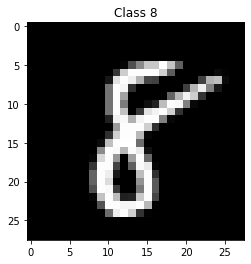

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
i=3495

#print(X_train[i])
plt.imshow(X_train[i], cmap='gray')
plt.title("Class {}".format(y_train[i]))
plt.show()

## Transform the data

We need to scale the input values to have the range (0,1).

In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector.

In [4]:
X_train_flat = X_train.reshape(60000, 784)
X_test_flat = X_test.reshape(10000, 784)
print("X_train matrix shape: {}".format(X_train_flat.shape))
print("X_test matrix shape: {}".format(X_test_flat.shape))

X_train matrix shape: (60000, 784)
X_test matrix shape: (10000, 784)


Transform the targets into one-hot encoding, i.e.
```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
```
etc.

In [5]:
from keras.utils import np_utils

n_classes = 10

print(y_train[49])

y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

print(y_train[49])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## Architecture definition

Create a sequential model

In [6]:
from tensorflow.keras.models import Sequential

model = Sequential()

Define its structure.

In [7]:
from tensorflow.keras.layers import Dense, Activation

model.add(Dense(64, input_shape=(784, )))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

Compile the model

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train the model

In [9]:
model.fit(X_train_flat, y_train,
          batch_size = 128, epochs = 10, verbose=1,
          validation_data=(X_test_flat, y_test))

Epoch 1/10
469/469 [==============================] - 9s 9ms/step - loss: 0.4180 - accuracy: 0.8849 - val_loss: 0.2374 - val_accuracy: 0.9303
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2081 - accuracy: 0.9398 - val_loss: 0.1713 - val_accuracy: 0.9499
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1598 - accuracy: 0.9536 - val_loss: 0.1427 - val_accuracy: 0.9582
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1314 - accuracy: 0.9612 - val_loss: 0.1239 - val_accuracy: 0.9628
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1121 - accuracy: 0.9669 - val_loss: 0.1125 - val_accuracy: 0.9655
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0973 - accuracy: 0.9715 - val_loss: 0.1114 - val_accuracy: 0.9663
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0846 - accuracy: 0.9752 - val_loss: 0.1030 - val_accuracy: 0.9693
Epoch 

## Evaluate the model

First we need to convert probability vectors to class indices.

In [10]:
y_pred = model.predict(X_test_flat)

print(y_pred.shape)

(10000, 10)


In [11]:
import numpy as np

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
print(y_pred_class.shape)

(10000,)


We can use the scikit-learn functions now.

In [12]:
from sklearn import metrics
from sklearn.metrics import accuracy_score


print ("Test accuracy: {:.4f}".format(accuracy_score(y_test_class, y_pred_class)))
print ()
print(metrics.classification_report(y_test_class, y_pred_class, digits=4))

Test accuracy: 0.9726

              precision    recall  f1-score   support

           0     0.9788    0.9878    0.9832       980
           1     0.9868    0.9885    0.9877      1135
           2     0.9674    0.9767    0.9720      1032
           3     0.9600    0.9733    0.9666      1010
           4     0.9735    0.9715    0.9725       982
           5     0.9696    0.9652    0.9674       892
           6     0.9779    0.9708    0.9743       958
           7     0.9727    0.9698    0.9713      1028
           8     0.9677    0.9548    0.9612       974
           9     0.9701    0.9643    0.9672      1009

    accuracy                         0.9726     10000
   macro avg     0.9724    0.9723    0.9723     10000
weighted avg     0.9726    0.9726    0.9726     10000



In [13]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_class, y_pred_class))

[[ 968    0    0    1    2    3    2    2    2    0]
 [   0 1122    4    0    0    1    3    1    4    0]
 [   5    2 1008    5    1    0    2    4    5    0]
 [   1    0    7  983    0    4    0    8    6    1]
 [   1    0    3    1  954    0    5    2    1   15]
 [   2    0    0   12    2  861    6    0    5    4]
 [   5    3    2    1    3   10  930    0    4    0]
 [   0    4   14    2    2    1    0  997    2    6]
 [   4    0    4   12    7    5    3    5  930    4]
 [   3    6    0    7    9    3    0    6    2  973]]


In [14]:
y_pred = model.predict(X_train_flat)
y_pred_class = np.argmax(y_pred, axis=1)
y_train_class = np.argmax(y_train, axis=1)

print ("Train accuracy: {:.4f}".format(accuracy_score(y_train_class, y_pred_class)))
print ()
print(metrics.classification_report(y_train_class, y_pred_class, digits=4))

Train accuracy: 0.9866

              precision    recall  f1-score   support

           0     0.9936    0.9932    0.9934      5923
           1     0.9923    0.9912    0.9918      6742
           2     0.9804    0.9904    0.9854      5958
           3     0.9836    0.9791    0.9814      6131
           4     0.9877    0.9899    0.9888      5842
           5     0.9852    0.9840    0.9846      5421
           6     0.9917    0.9927    0.9922      5918
           7     0.9860    0.9858    0.9859      6265
           8     0.9844    0.9786    0.9815      5851
           9     0.9803    0.9802    0.9802      5949

    accuracy                         0.9866     60000
   macro avg     0.9865    0.9865    0.9865     60000
weighted avg     0.9866    0.9866    0.9866     60000



# Convolutional neural network for MNIST classification

## Reshape the input data

In [15]:
X_train3d = X_train.reshape(60000, 28, 28, 1)
X_test3d = X_test.reshape(10000, 28, 28, 1)

## Architecture definition

Create a sequential model and define its structure.

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), input_shape=(28, 28, 1, )))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 activation_2 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                46090     
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                      

Compile the model.

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train the model

In [19]:
model.fit(X_train3d, y_train,
          batch_size = 128, epochs = 10, verbose=1,
          validation_data=(X_test3d, y_test))

Epoch 1/10
469/469 [==============================] - 12s 10ms/step - loss: 0.2960 - accuracy: 0.9177 - val_loss: 0.1045 - val_accuracy: 0.9696
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0922 - accuracy: 0.9743 - val_loss: 0.0637 - val_accuracy: 0.9815
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0657 - accuracy: 0.9812 - val_loss: 0.0544 - val_accuracy: 0.9832
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0531 - accuracy: 0.9847 - val_loss: 0.0455 - val_accuracy: 0.9854
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0452 - accuracy: 0.9865 - val_loss: 0.0432 - val_accuracy: 0.9865
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0395 - accuracy: 0.9880 - val_loss: 0.0420 - val_accuracy: 0.9863
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0348 - accuracy: 0.9892 - val_loss: 0.0437 - val_accuracy: 0.9869
Epoc

## Evaluate the model

In [20]:
y_pred = model.predict(X_test3d)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [21]:
print ("Test accuracy: {:.4f}".format(accuracy_score(y_test_class, y_pred_class)))
print ()
print(metrics.classification_report(y_test_class, y_pred_class, digits=4))

Test accuracy: 0.9866

              precision    recall  f1-score   support

           0     0.9828    0.9918    0.9873       980
           1     0.9904    0.9982    0.9943      1135
           2     0.9808    0.9893    0.9850      1032
           3     0.9881    0.9881    0.9881      1010
           4     0.9849    0.9939    0.9894       982
           5     0.9768    0.9922    0.9844       892
           6     0.9979    0.9739    0.9857       958
           7     0.9844    0.9835    0.9839      1028
           8     0.9876    0.9795    0.9835       974
           9     0.9919    0.9742    0.9830      1009

    accuracy                         0.9866     10000
   macro avg     0.9866    0.9865    0.9865     10000
weighted avg     0.9867    0.9866    0.9866     10000



In [22]:
print(confusion_matrix(y_test_class, y_pred_class))

[[ 972    1    2    0    1    1    1    1    1    0]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   1    1 1021    1    1    0    0    4    3    0]
 [   0    0    2  998    0    5    0    1    4    0]
 [   0    0    1    0  976    0    0    0    0    5]
 [   2    0    0    4    0  885    1    0    0    0]
 [   8    3    0    0    4    7  933    0    3    0]
 [   0    2    8    4    1    0    0 1011    1    1]
 [   6    0    5    1    1    2    0    3  954    2]
 [   0    4    1    1    7    6    0    7    0  983]]


In [23]:
y_pred = model.predict(X_train3d)
y_pred_class = np.argmax(y_pred, axis=1)
y_train_class = np.argmax(y_train, axis=1)

print ("Train accuracy: {:.4f}".format(accuracy_score(y_train_class, y_pred_class)))
print ()
print(metrics.classification_report(y_train_class, y_pred_class, digits=4))

Train accuracy: 0.9944

              precision    recall  f1-score   support

           0     0.9980    0.9978    0.9979      5923
           1     0.9948    0.9985    0.9967      6742
           2     0.9921    0.9965    0.9943      5958
           3     0.9980    0.9899    0.9939      6131
           4     0.9927    0.9962    0.9944      5842
           5     0.9888    0.9974    0.9931      5421
           6     0.9993    0.9922    0.9958      5918
           7     0.9917    0.9955    0.9936      6265
           8     0.9923    0.9938    0.9931      5851
           9     0.9958    0.9859    0.9908      5949

    accuracy                         0.9944     60000
   macro avg     0.9944    0.9944    0.9944     60000
weighted avg     0.9944    0.9944    0.9944     60000



## Let's look at some incorrectly classified examples

In [24]:
y_pred = model.predict(X_test3d)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

incorrect_indices = np.nonzero(y_pred_class != y_test_class)[0]
print(incorrect_indices)

[  18   62  211  259  445  449  582  659  684  844  947  965 1014 1039
 1181 1182 1226 1232 1242 1247 1260 1319 1326 1393 1414 1441 1530 1553
 1621 1709 1717 1722 1754 1790 1878 1901 1955 1982 2035 2053 2098 2118
 2129 2130 2135 2189 2272 2280 2293 2329 2387 2406 2454 2488 2597 2654
 2760 2836 2896 2921 2927 2939 2953 2995 3030 3060 3422 3503 3520 3558
 3559 3597 3727 3749 3751 3808 3850 3853 3906 4007 4063 4065 4075 4176
 4199 4224 4238 4248 4256 4497 4507 4571 4740 4807 4814 4823 4838 4860
 4956 4966 5199 5246 5634 5749 5955 5973 6011 6091 6400 6532 6569 6571
 6576 6597 6625 6651 8094 8311 8332 8408 8527 9009 9015 9024 9634 9638
 9642 9664 9679 9692 9698 9729 9770 9904]


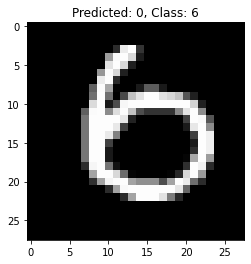

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
i = incorrect_indices[3]

plt.imshow(X_test[i], cmap='gray')
plt.title("Predicted: {}, Class: {}".format(y_pred_class[i], y_test_class[i]))
plt.show()